# LSTM model training

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6136/6136 ━━━━━━━━━━━━━━━━━━━━ 116s 18ms/step - loss: 13.7881 - mae: 1.3352 - val_loss: 1.7759 - val_mae: 0.9768
Epoch 2/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 138s 18ms/step - loss: 1.9328 - mae: 0.9731 - val_loss: 1.7485 - val_mae: 0.9558
Epoch 3/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 142s 18ms/step - loss: 1.5968 - mae: 0.9045 - val_loss: 1.3988 - val_mae: 0.8607
Epoch 4/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - loss: 1.4522 - mae: 0.8637 - val_loss: 1.2808 - val_mae: 0.8133
Epoch 5/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 145s 18ms/step - loss: 1.4075 - mae: 0.8314 - val_loss: 1.1811 - val_mae: 0.7811
Epoch 6/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 139s 18ms/step - loss: 1.3151 - mae: 0.8103 - val_loss: 1.1510 - val_mae: 0.7748
Epoch 7/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 110s 18ms/step - loss: 1.2583 - mae: 0.7960 - val_loss: 1.1852 - val_mae: 0.7922
Epoch 8/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 109s 18ms/step - loss: 1.2238 - mae: 0.7863 - val_loss: 1.1229 - val_mae: 0.7512
Epoch 9/300
6136/61

R2 Score: 0.8820119722133599


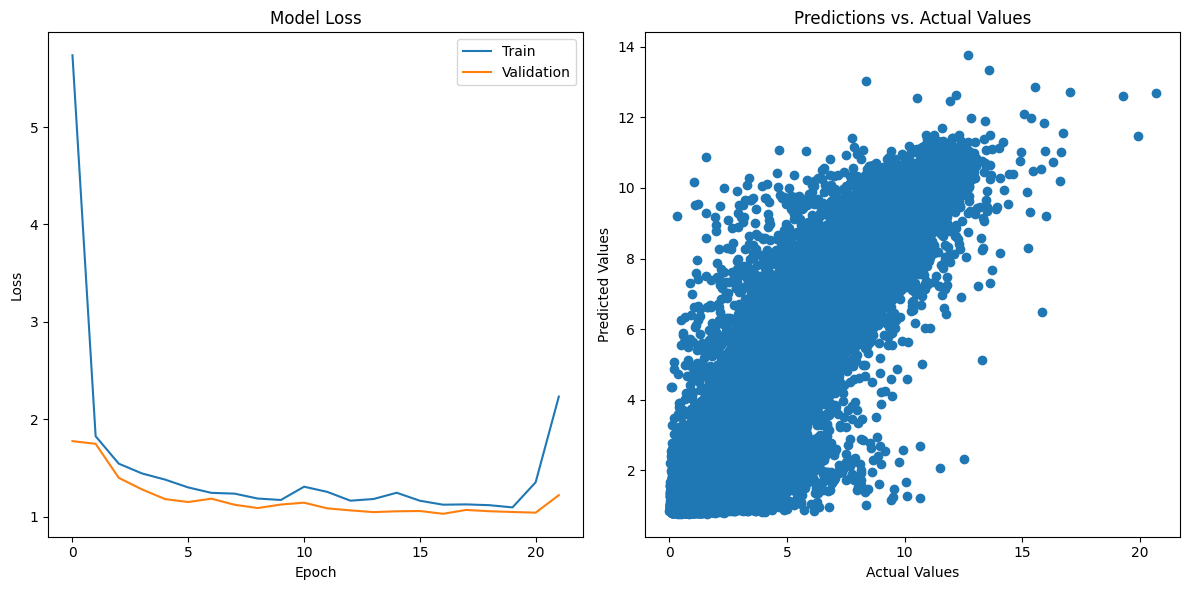

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set a random seed for reproducibility
np.random.seed(0)

# Mount Google Drive if not already done
from google.colab import drive
drive.mount('/content/drive')

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/RESEARCH/wind speed prediction/Gosaikunda/Data/2003_2022_gk.csv")

# Changing datatype from int to float
data["YEAR"] = data["YEAR"].astype(float)
data["MO"] = data["MO"].astype(float)
data["DY"] = data["DY"].astype(float)
data["HR"] = data["HR"].astype(float)
data.dropna(axis=0, inplace=True)

# Define features and target
X = data.drop(['WS2M','WD2M','WS10M','WD10M'], axis=1)
y = data['WS10M']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the NN
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compile the ANN
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)

# Train the ANN
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, batch_size=16, epochs=300, callbacks=[early_stopping], validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print(f'Test Loss: {test_loss}')

# Calculate R-squared (R2) error
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot predictions vs. actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()

# Save the trained model
model.save('/content/drive/MyDrive/DataWind/your_model_name_rasuwa_Temp.h5')


# LSTM model testing

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R-squared (R2) error: 0.93


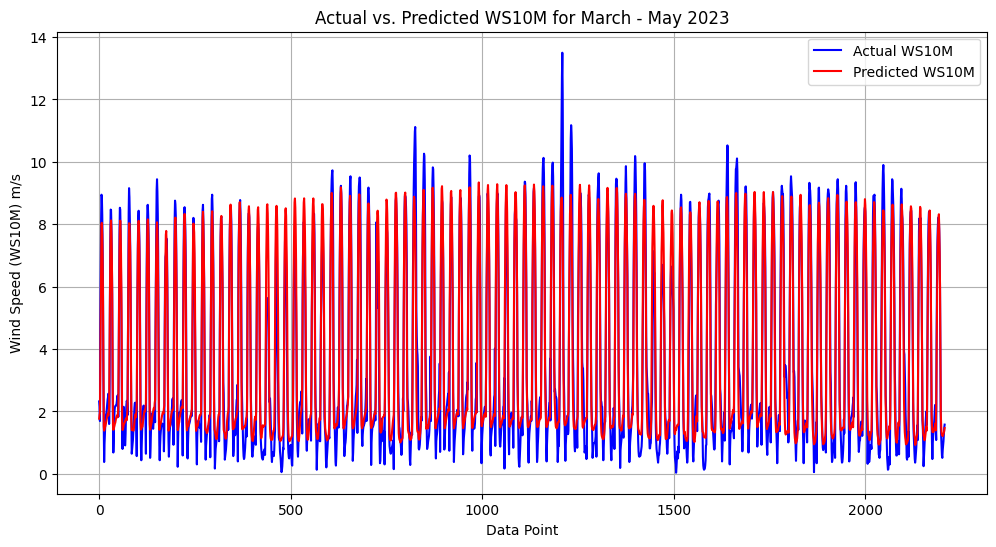

In [5]:
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your trained model
model = load_model('/content/drive/MyDrive/DataWind/your_model_name_rasuwa_Temp.h5')

# Load the data for march, april and may 2023
mar_may_data = pd.read_csv("/content/drive/MyDrive/RESEARCH/wind speed prediction/Gosaikunda/Data/2023_mar-may_gk.csv")

# Extract the WS2M column (the target variable you want to predict)
actual_WS10M = mar_may_data['WS10M']

# Drop the WS2M column from the input data
mar_may_data = mar_may_data.drop(['WS2M','WD2M','WS10M','WD10M'], axis=1)

# Define the path to your training data
training_data_path = "/content/drive/MyDrive/RESEARCH/wind speed prediction/Gosaikunda/Data/2003_2022_gk.csv"

# Load your training data (replace 'your_training_data.csv' with the actual file name)
training_data = pd.read_csv(training_data_path)

# Ensure that the columns in the training data match those in the test data
# If there are extra columns in the training data, remove them
columns_to_drop = [col for col in training_data.columns if col not in mar_may_data.columns]
training_data = training_data.drop(columns=columns_to_drop)

# Define and fit the scaler using the same scaler used during training
scaler = StandardScaler()
scaler.fit(training_data)  # Fit the scaler on your training data

# Preprocess the features, normalize, and scale them using the same scaler used for training
X_mar_may_data = scaler.transform(mar_may_data)

# Use the trained model to make predictions for January 2023
y_pred_mar_may_data = model.predict(X_mar_may_data)

# Calculate the R-squared (R2) error
r2 = r2_score(actual_WS10M, y_pred_mar_may_data)
print(f'R-squared (R2) error: {r2:.2f}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_WS10M, label='Actual WS10M', color='blue')
plt.plot(y_pred_mar_may_data, label='Predicted WS10M', color='red')
plt.title('Actual vs. Predicted WS10M for March - May 2023')
plt.xlabel('Data Point')
plt.ylabel('Wind Speed (WS10M) m/s')
plt.legend()
plt.grid(True)
plt.show()
